In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cosmos_cat=os.path.join('..', 'lephare_cosmos', 'COSMOS2020.in')
cosmos_cat

'../lephare_cosmos/COSMOS2020.in'

In [3]:
cosmos_cat_arr = np.loadtxt(cosmos_cat)
cosmos_cat_arr

array([[ 1.00000000e+00, -6.41449459e-32,  1.10222285e-31, ...,
         0.00000000e+00,  4.83900000e+00,  3.00400000e+03],
       [ 2.00000000e+00,  4.27157946e-30,  2.40319217e-31, ...,
         0.00000000e+00,  1.16600000e+00,  1.10040000e+04],
       [ 3.00000000e+00,  2.38601703e-28,  4.86178398e-31, ...,
         0.00000000e+00,  1.64900000e-01,  1.10040000e+04],
       ...,
       [ 1.84180000e+04,  6.03762848e-29,  2.91500030e-31, ...,
         0.00000000e+00,  2.14000000e-01,  1.10040000e+04],
       [ 1.84190000e+04,  7.65085481e-29,  3.44004778e-31, ...,
         0.00000000e+00,  3.05300000e-01,  3.50000000e+00],
       [ 1.84200000e+04,  2.36320782e-29,  3.08680138e-31, ...,
         0.00000000e+00,  3.44800000e-01,  3.50000000e+00]])

In [4]:
cosmos_filt_dir = os.path.join('..', 'LEPHARE', 'filt')
'''
cosmos_filt_list = [ os.path.join(cosmos_filt_dir, filt) for filt in ["cosmos/u_cfht.lowres",\
                                                                      "cosmos/u_new.pb",\
                                                                      "hsc/gHSC.pb",\
                                                                      "hsc/rHSC.pb",\
                                                                      "hsc/iHSC.pb",\
                                                                      "hsc/zHSC.pb",\
                                                                      "hsc/yHSC.pb",\
                                                                      "vista/Y.lowres",\
                                                                      "vista/J.lowres",\
                                                                      "vista/H.lowres",\
                                                                      "vista/K.lowres",\
                                                                      "cosmos/IB427.lowres",\
                                                                      "cosmos/IB464.lowres",\
                                                                      "cosmos/IB484.lowres",\
                                                                      "cosmos/IB505.lowres",\
                                                                      "cosmos/IB527.lowres",\
                                                                      "cosmos/IB574.lowres",\
                                                                      "cosmos/IB624.lowres",\
                                                                      "cosmos/IB679.lowres",\
                                                                      "cosmos/IB709.lowres",\
                                                                      "cosmos/IB738.lowres",\
                                                                      "cosmos/IB767.lowres",\
                                                                      "cosmos/IB827.lowres",\
                                                                      "cosmos/NB711.lowres",\
                                                                      "cosmos/NB816.lowres",\
                                                                      "vista/NB118.lowres",\
                                                                      "cosmos/irac_ch1.lowres",\
                                                                      "cosmos/irac_ch2.lowres",\
                                                                      "cosmos/irac_ch3.lowres",\
                                                                      "cosmos/irac_ch4.lowres"]
                   ]
'''
cosmos_filt_list = [ os.path.join(cosmos_filt_dir, filt) for filt in ["cosmos/u_cfht.lowres",\
                                                                      "cosmos/u_new.pb",\
                                                                      "hsc/gHSC.pb",\
                                                                      "hsc/rHSC.pb",\
                                                                      "hsc/iHSC.pb",\
                                                                      "hsc/zHSC.pb",\
                                                                      "hsc/yHSC.pb"]
                   ]
N_FILT=len(cosmos_filt_list)
N_FILT

7

In [5]:
1+2*N_FILT+1

16

In [6]:
cosmos_filt_list

['../LEPHARE/filt/cosmos/u_cfht.lowres',
 '../LEPHARE/filt/cosmos/u_new.pb',
 '../LEPHARE/filt/hsc/gHSC.pb',
 '../LEPHARE/filt/hsc/rHSC.pb',
 '../LEPHARE/filt/hsc/iHSC.pb',
 '../LEPHARE/filt/hsc/zHSC.pb',
 '../LEPHARE/filt/hsc/yHSC.pb']

In [7]:
#filt_trans_type = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
filt_trans_type = [1,1,1,1,1,1,1]
assert len(filt_trans_type)==N_FILT
print(len(filt_trans_type))

7


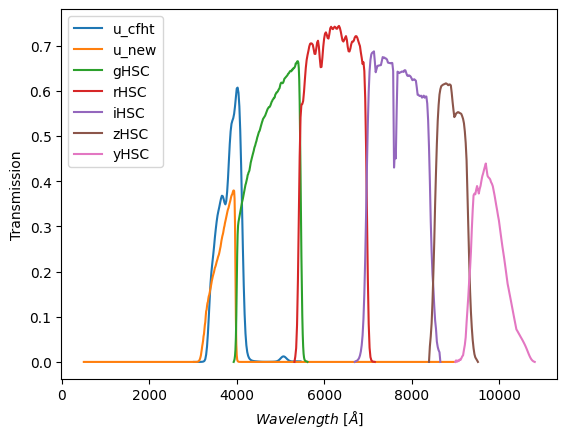

In [8]:
for filt in cosmos_filt_list: #[:7]+cosmos_filt_list[12:-5]+cosmos_filt_list[-4:]:
    x, y = np.loadtxt(filt, unpack=True)
    lab = (filt.split("/")[-1]).split('.')[0]
    plt.plot(x, y, label=lab)
plt.xlabel("$ Wavelength\ [\AA]$")
plt.ylabel("Transmission")
plt.legend()

In [9]:
filt_dict = {}
for _id, (filt, trans_typ) in enumerate(zip(cosmos_filt_list, filt_trans_type)):
    folder, file = filt.split('/')[-2:]
    name=folder+"_"+file.split('.')[0]
    if trans_typ == 1:
        transm = "photons"
    else:
        transm = "energy"
    filt_dict[_id] = {"name" : name, "path" : filt, "transmission" : transm}
filt_dict

{0: {'name': 'cosmos_u_cfht',
  'path': '../LEPHARE/filt/cosmos/u_cfht.lowres',
  'transmission': 'photons'},
 1: {'name': 'cosmos_u_new',
  'path': '../LEPHARE/filt/cosmos/u_new.pb',
  'transmission': 'photons'},
 2: {'name': 'hsc_gHSC',
  'path': '../LEPHARE/filt/hsc/gHSC.pb',
  'transmission': 'photons'},
 3: {'name': 'hsc_rHSC',
  'path': '../LEPHARE/filt/hsc/rHSC.pb',
  'transmission': 'photons'},
 4: {'name': 'hsc_iHSC',
  'path': '../LEPHARE/filt/hsc/iHSC.pb',
  'transmission': 'photons'},
 5: {'name': 'hsc_zHSC',
  'path': '../LEPHARE/filt/hsc/zHSC.pb',
  'transmission': 'photons'},
 6: {'name': 'hsc_yHSC',
  'path': '../LEPHARE/filt/hsc/yHSC.pb',
  'transmission': 'photons'}}

In [10]:
len(filt_dict.keys())

7

In [11]:
_sel_emu = [0]+[1+i for i in range(2*N_FILT)]+[62]
print(cosmos_cat_arr.shape[1])
_sel_lp = [0]+[1+i for i in range(2*N_FILT)]+list(np.arange(61,cosmos_cat_arr.shape[1]))
_sel_lp

64


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 61, 62, 63]

In [12]:
cosmos_cat_arr[3, _sel_emu]

array([4.00000000e+00, 1.73292941e-31, 2.10016195e-31, 6.68536022e-32,
       1.10026847e-31, 8.78764385e-33, 7.17811864e-32, 3.13135144e-31,
       8.99579025e-32, 1.38700453e-30, 1.13231057e-31, 2.20410927e-30,
       1.79501561e-31, 2.21642563e-30, 3.72873344e-31, 5.74200000e+00])

In [13]:
cosmos_cat_arr[3, _sel_lp]

array([4.00000000e+00, 1.73292941e-31, 2.10016195e-31, 6.68536022e-32,
       1.10026847e-31, 8.78764385e-33, 7.17811864e-32, 3.13135144e-31,
       8.99579025e-32, 1.38700453e-30, 1.13231057e-31, 2.20410927e-30,
       1.79501561e-31, 2.21642563e-30, 3.72873344e-31, 0.00000000e+00,
       5.74200000e+00, 3.00400000e+03])

In [14]:
cosmos_inp_for_emu_all = cosmos_cat_arr[:, _sel_emu]
cosmos_inp_for_lp_all = cosmos_cat_arr[:, _sel_lp]
_sel_z = (cosmos_inp_for_emu_all[:, -1]<=3.0)
cosmos_inp_for_emu_zfilt = cosmos_inp_for_emu_all[_sel_z, :]
cosmos_inp_for_lp_zfilt = cosmos_inp_for_lp_all[_sel_z, :]
_rand_sel = np.random.choice(np.arange(cosmos_inp_for_emu_zfilt.shape[0]), size=1000)
cosmos_inp_for_emu = cosmos_inp_for_emu_zfilt[_rand_sel, :]
cosmos_inp_for_lp = cosmos_inp_for_lp_zfilt[_rand_sel, :]
cosmos_inp_for_lp.shape

(1000, 18)

(array([147., 243., 256., 131.,  88.,  51.,  14.,  21.,  30.,  19.]),
 array([0.0244 , 0.31186, 0.59932, 0.88678, 1.17424, 1.4617 , 1.74916,
        2.03662, 2.32408, 2.61154, 2.899  ]),
 <BarContainer object of 10 artists>)

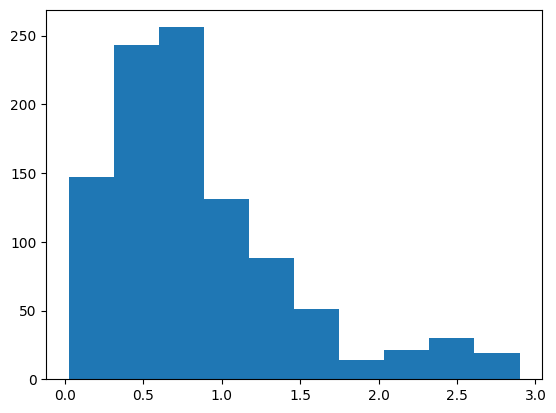

In [15]:
import matplotlib.pyplot as plt
plt.hist(cosmos_inp_for_emu[:,-1])

In [16]:
inpfilename="COSMOS2020_emu_hscOnly_CC.inp"
inpfilename_lp="COSMOS2020_emu_hscOnly_CC_lp.in"
_fmt_fefe = ['%.18g' for fe in range(2*N_FILT)]
fmt_list = ['%.1i']+_fmt_fefe+['%.6g']
fmt_list_lp = ['%.1i']+_fmt_fefe+['%.1i', '%.6g', '%.10g']
print(fmt_list_lp)
if False:
    np.savetxt(inpfilename, cosmos_inp_for_emu, fmt=fmt_list)
    np.savetxt(inpfilename_lp, cosmos_inp_for_lp, fmt=fmt_list_lp)

['%.1i', '%.18g', '%.18g', '%.18g', '%.18g', '%.18g', '%.18g', '%.18g', '%.18g', '%.18g', '%.18g', '%.18g', '%.18g', '%.18g', '%.18g', '%.1i', '%.6g', '%.10g']


In [17]:
gal_test = cosmos_inp_for_emu[3, :-1]
gal_test = [gal_test[2*k] for k in range(len(gal_test)//2)]
gal_test

[11579.0,
 5.830812856844248e-32,
 9.502477102350944e-32,
 5.311584071648185e-32,
 5.960248890801992e-32,
 6.639793358804725e-32,
 1.0515211917611202e-31]

In [18]:
mags_test = -2.5*np.log10(gal_test[1:]) - 48.6

In [19]:
mags_test

array([29.48567724, 28.95540792, 29.58693985, 29.46183901, 29.34461359,
       28.84545493])

In [20]:
missing_filts = np.where(np.isnan(mags_test))[0]
missing_filts

array([], dtype=int64)

In [21]:
check = np.where(np.array(gal_test)<=0.)[0]
check

array([], dtype=int64)

In [22]:
check_filts = {}
check_fluxes = {}
for id_gal in range(cosmos_inp_for_emu.shape[0]):
    gal_test = cosmos_inp_for_emu[id_gal, :-1]
    gal_test = [gal_test[2*k] for k in range(len(gal_test)//2)]
    mags_test = -2.5*np.log10(gal_test[1:]) - 48.6
    missing_filts = np.where(np.isnan(mags_test))[0]
    check = np.where(np.array(gal_test[1:])<=0.)[0]
    if len(missing_filts)>0:
        check_filts[id_gal] = {'missing filters': missing_filts, 'computed mags': mags_test}
    if len(check)>0:
        check_fluxes[id_gal] = {'bad fluxes': check, 'fluxes':gal_test[1:], 'computed mags': mags_test}

/tmp/ipykernel_757/792581683.py:6: RuntimeWarning: invalid value encountered in log10
  mags_test = -2.5*np.log10(gal_test[1:]) - 48.6


In [23]:
check_filts

{44: {'missing filters': array([1]),
  'computed mags': array([28.09733001,         nan, 27.34749354, 27.0934066 , 27.14907699,
         26.81674601])},
 77: {'missing filters': array([0, 1, 2, 3, 4, 5]),
  'computed mags': array([nan, nan, nan, nan, nan, nan])},
 116: {'missing filters': array([1]),
  'computed mags': array([26.66427053,         nan, 24.94230194, 24.74186737, 24.71507944,
         24.49136578])},
 165: {'missing filters': array([1]),
  'computed mags': array([28.28843407,         nan, 27.16569121, 26.89558139, 26.87900992,
         26.65508928])},
 183: {'missing filters': array([1]),
  'computed mags': array([28.17020067,         nan, 27.61525639, 27.1952936 , 27.12904267,
         26.84834775])},
 186: {'missing filters': array([1]),
  'computed mags': array([28.16348281,         nan, 27.98177278, 27.73242869, 27.53059096,
         27.23453259])},
 190: {'missing filters': array([1]),
  'computed mags': array([28.32153343,         nan, 28.41576617, 28.09002533, 27.7

In [24]:
check_fluxes

{44: {'bad fluxes': array([1]),
  'fluxes': [2.094440350961793e-31,
   -99.0,
   4.178328524235125e-31,
   5.2800417966337004e-31,
   5.016134851314771e-31,
   6.812422815133999e-31],
  'computed mags': array([28.09733001,         nan, 27.34749354, 27.0934066 , 27.14907699,
         26.81674601])},
 77: {'bad fluxes': array([0, 1, 2, 3, 4, 5]),
  'fluxes': [-99.0, -99.0, -99.0, -99.0, -99.0, -99.0],
  'computed mags': array([nan, nan, nan, nan, nan, nan])},
 116: {'bad fluxes': array([1]),
  'fluxes': [7.839561785520928e-31,
   -99.0,
   3.828945836334571e-30,
   4.6052483241486856e-30,
   4.720285022506597e-30,
   5.800343149895228e-30],
  'computed mags': array([26.66427053,         nan, 24.94230194, 24.74186737, 24.71507944,
         24.49136578])},
 165: {'bad fluxes': array([1]),
  'fluxes': [1.7564119040551538e-31,
   -99.0,
   4.939960936590525e-31,
   6.335303764067442e-31,
   6.432740490807102e-31,
   7.906136143178619e-31],
  'computed mags': array([28.28843407,         nan, 

In [25]:
#sed_file=os.path.join('..', 'lephare_cosmos', 'SED_FORS2_KinCalClus_SL_v6.list')
#sed_file=os.path.abspath("../lephare_cosmos/SED_FORS2_ColorSelect_SL_v5.list")
#sed_file=os.path.join('..', 'lephare_cosmos', 'SED_FORS2_DustySelect_SL_v6.list')
#sed_file=os.path.join('..', 'LEPHARE', 'sed', 'GAL', 'CFHTLS_230506', 'CFHTLS_MOD.list')

sed_file=os.path.join('..', 'lephare_cosmos', 'SED_FORS2_DSPS_noDust_v1.list')

sed_list = []
with open(sed_file, 'r') as seds:
    for sed in seds:
        if sed[0] == "#":
            pass
        else:
            sed_list.append(os.path.join('../LEPHARE/sed/GAL', sed[:-1]))
#sed_list = [_sed for _sed in sed_list if 'AVG' in _sed or 'EXT' in _sed]
sed_list

['../LEPHARE/sed/GAL/FORS2_DSPS_batch1/SPEC226_DSPS_noDust.sed',
 '../LEPHARE/sed/GAL/FORS2_DSPS_batch1/SPEC227_DSPS_noDust.sed',
 '../LEPHARE/sed/GAL/FORS2_DSPS_batch1/SPEC451_DSPS_noDust.sed',
 '../LEPHARE/sed/GAL/FORS2_DSPS_batch1/SPEC714_DSPS_noDust.sed',
 '../LEPHARE/sed/GAL/FORS2_DSPS_batch1/SPEC496_DSPS_noDust.sed',
 '../LEPHARE/sed/GAL/FORS2_DSPS_batch1/SPEC589_DSPS_noDust.sed',
 '../LEPHARE/sed/GAL/FORS2_DSPS_batch1/SPEC282_DSPS_noDust.sed',
 '../LEPHARE/sed/GAL/FORS2_DSPS_batch1/SPEC235_DSPS_noDust.sed',
 '../LEPHARE/sed/GAL/FORS2_DSPS_batch1/SPEC87_DSPS_noDust.sed',
 '../LEPHARE/sed/GAL/FORS2_DSPS_batch1/SPEC107_DSPS_noDust.sed',
 '../LEPHARE/sed/GAL/FORS2_DSPS_batch1/SPEC113_DSPS_noDust.sed',
 '../LEPHARE/sed/GAL/FORS2_DSPS_batch1/SPEC114_DSPS_noDust.sed',
 '../LEPHARE/sed/GAL/FORS2_DSPS_batch1/SPEC265_DSPS_noDust.sed',
 '../LEPHARE/sed/GAL/FORS2_DSPS_batch1/SPEC537_DSPS_noDust.sed',
 '../LEPHARE/sed/GAL/FORS2_DSPS_batch1/SPEC546_DSPS_noDust.sed',
 '../LEPHARE/sed/GAL/FORS2

In [26]:
if False:
    sed_dict = {}
    for _id, sed in enumerate(sed_list):
        file = sed.split('/')[-1]
        attrs = file.split("_")
        if attrs[0] == "AVG":
            name="_".join(attrs[:4])
        else:
            name="_".join(attrs[2:4])+"-"+(attrs[-1]).split('.')[0]
        sed_dict[_id] = {'name' : name, 'path' : sed}
    sed_dict

In [27]:
if False:
    sed_dict = {}
    for _id, sed in enumerate(sed_list):
        file = sed.split('/')[-1]
        attrs = file.split(".")
        name="_".join((attrs[0], attrs[2]))
        sed_dict[_id] = {'name' : name, 'path' : sed}
    sed_dict

In [28]:
if True:
    sed_dict = {}
    for _id, sed in enumerate(sed_list):
        file = sed.split('/')[-1]
        attrs = (file.split(".")[0]).split('_')
        name=f"FORS2_{attrs[0]}_{attrs[1]}"
        sed_dict[_id] = {'name' : name, 'path' : sed}
    sed_dict

In [29]:
sed_dict

{0: {'name': 'FORS2_SPEC226_DSPS',
  'path': '../LEPHARE/sed/GAL/FORS2_DSPS_batch1/SPEC226_DSPS_noDust.sed'},
 1: {'name': 'FORS2_SPEC227_DSPS',
  'path': '../LEPHARE/sed/GAL/FORS2_DSPS_batch1/SPEC227_DSPS_noDust.sed'},
 2: {'name': 'FORS2_SPEC451_DSPS',
  'path': '../LEPHARE/sed/GAL/FORS2_DSPS_batch1/SPEC451_DSPS_noDust.sed'},
 3: {'name': 'FORS2_SPEC714_DSPS',
  'path': '../LEPHARE/sed/GAL/FORS2_DSPS_batch1/SPEC714_DSPS_noDust.sed'},
 4: {'name': 'FORS2_SPEC496_DSPS',
  'path': '../LEPHARE/sed/GAL/FORS2_DSPS_batch1/SPEC496_DSPS_noDust.sed'},
 5: {'name': 'FORS2_SPEC589_DSPS',
  'path': '../LEPHARE/sed/GAL/FORS2_DSPS_batch1/SPEC589_DSPS_noDust.sed'},
 6: {'name': 'FORS2_SPEC282_DSPS',
  'path': '../LEPHARE/sed/GAL/FORS2_DSPS_batch1/SPEC282_DSPS_noDust.sed'},
 7: {'name': 'FORS2_SPEC235_DSPS',
  'path': '../LEPHARE/sed/GAL/FORS2_DSPS_batch1/SPEC235_DSPS_noDust.sed'},
 8: {'name': 'FORS2_SPEC87_DSPS',
  'path': '../LEPHARE/sed/GAL/FORS2_DSPS_batch1/SPEC87_DSPS_noDust.sed'},
 9: {'name':

In [30]:
cosmo_dict = {"h0": 70.0, "om0": 0.3, "l0": 0.7, "jax-cosmo": False}
z_grid_dict = {"z_min": 0.01, "z_max": 3., "z_step": 0.02}
wl_grid_dict = {"lambda_min": 1., "lambda_max": 25000., "lambda_step": 1.}
extinc_dict = {0 : {"name" : "Calzetti", "path" : os.path.join('..','LEPHARE','ext','SB_calzetti.dat')},\
               1 : {"name" : "Prevot", "path" : os.path.join('..','LEPHARE','ext','SMC_prevot.dat')},\
              }
#extinc_dict = {0 : {"name" : "Calzetti", "path" : os.path.join('..','LEPHARE','ext','SB_calzetti.dat')}}
#extinc_dict = {0 : {"name" : "Calzetti", "path" : os.path.abspath('../LEPHARE/ext/SB_calzetti.dat')}}
ebv_list = [0., 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5] #[0., 0.1, 0.2, 0.4]
#ebv_list = [0., 0.1, 0.2, 0.4] # [0.]
estimator = "chi2"
opa_dir = os.path.join('..','LEPHARE','opa')
opa_file = os.path.join(opa_dir, 'OPACITY.dat')
data_inp_dict = {"path": inpfilename, "type": "F"}
data_inp_dict

{'path': 'COSMOS2020_emu_hscOnly_CC.inp', 'type': 'F'}

In [31]:
run_opt_dict = {"Cosmology" : cosmo_dict,\
                "Z_GRID" : z_grid_dict,\
                "WL_GRID" : wl_grid_dict,\
                "Templates" : sed_dict,\
                "Filters" : filt_dict,\
                "Dataset" : data_inp_dict,\
                "Extinctions" : extinc_dict,\
                "e_BV": ebv_list,\
                "Opacity": opa_file,\
                "Estimator" : estimator,\
                "prior" : True,\
                "E(B-V) prior" : True,\
                "Evidence analysis": True,\
                "z_spec analysis": True,\
                "NMOD": 5,\
                "save results" : True,\
                "run name" : "COSMOS2020-with-FORS2-HSC_only-jax-CC-prior-full-DSPS_tempV1"
               }
run_opt_dict

{'Cosmology': {'h0': 70.0, 'om0': 0.3, 'l0': 0.7, 'jax-cosmo': False},
 'Z_GRID': {'z_min': 0.01, 'z_max': 3.0, 'z_step': 0.02},
 'WL_GRID': {'lambda_min': 1.0, 'lambda_max': 25000.0, 'lambda_step': 1.0},
 'Templates': {0: {'name': 'FORS2_SPEC226_DSPS',
   'path': '../LEPHARE/sed/GAL/FORS2_DSPS_batch1/SPEC226_DSPS_noDust.sed'},
  1: {'name': 'FORS2_SPEC227_DSPS',
   'path': '../LEPHARE/sed/GAL/FORS2_DSPS_batch1/SPEC227_DSPS_noDust.sed'},
  2: {'name': 'FORS2_SPEC451_DSPS',
   'path': '../LEPHARE/sed/GAL/FORS2_DSPS_batch1/SPEC451_DSPS_noDust.sed'},
  3: {'name': 'FORS2_SPEC714_DSPS',
   'path': '../LEPHARE/sed/GAL/FORS2_DSPS_batch1/SPEC714_DSPS_noDust.sed'},
  4: {'name': 'FORS2_SPEC496_DSPS',
   'path': '../LEPHARE/sed/GAL/FORS2_DSPS_batch1/SPEC496_DSPS_noDust.sed'},
  5: {'name': 'FORS2_SPEC589_DSPS',
   'path': '../LEPHARE/sed/GAL/FORS2_DSPS_batch1/SPEC589_DSPS_noDust.sed'},
  6: {'name': 'FORS2_SPEC282_DSPS',
   'path': '../LEPHARE/sed/GAL/FORS2_DSPS_batch1/SPEC282_DSPS_noDust.sed'}

In [32]:
import json

In [33]:
if False:
    with open(f"{run_opt_dict['run name']}.json", "w") as wf:
        json.dump(run_opt_dict, wf)

## Opacity test

In [34]:
opa_dir = os.path.abspath('../LEPHARE/opa')
opa_file = os.path.join(opa_dir, 'OPACITY.dat')
opa_file

'/sps/lsst/groups/photoz/jocheval/PhotoZ_PhD/LEPHARE/opa/OPACITY.dat'

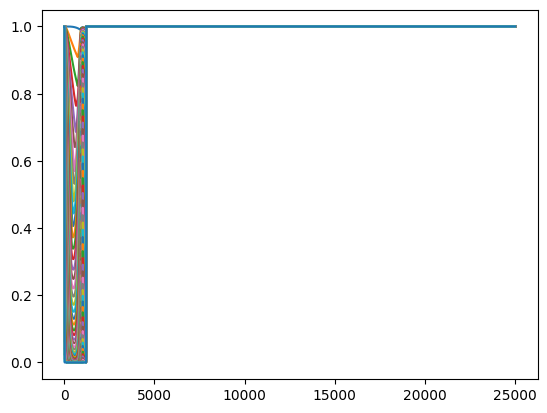

In [35]:
wl_grid = np.arange(wl_grid_dict["lambda_min"], wl_grid_dict["lambda_max"], wl_grid_dict["lambda_step"])
with open(opa_file) as f_opa:
    for opa_line in f_opa:
        opa_ascii_file = os.path.join(opa_dir, opa_line.split(' ')[-1][:-1])
        wls, op = np.loadtxt(opa_ascii_file, unpack=True)
        op_interp = np.interp(wl_grid, wls, op, left=1., right=1., period=None)
        plt.plot(wl_grid, op_interp)

(0.0, 1300.0)

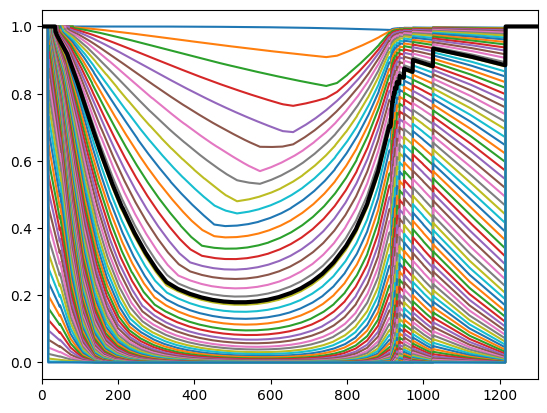

In [36]:
z_opas, file_opa_z = np.loadtxt(opa_file, dtype=str, unpack=True)
z_opas = np.float64(z_opas)
opa_arr = np.empty((len(z_opas), len(wl_grid)))
for fid_, _file in enumerate(file_opa_z):
    opa_ascii_file = os.path.join(opa_dir, _file)
    wls, op = np.loadtxt(opa_ascii_file, unpack=True)
    op_interp = np.interp(wl_grid, wls, op, left=1., right=1., period=None)
    opa_arr[fid_, :] = op_interp
    plt.plot(wl_grid, opa_arr[fid_, :])

z_test = 1.77
opa_test = np.empty(opa_arr.shape[1])
for _col in range(opa_arr.shape[1]):
    opa_test[_col] = np.interp(z_test, z_opas, opa_arr[:, _col])

plt.plot(wl_grid, opa_test, c='k', lw=3)
plt.xlim(0.0, 1300.)

In [37]:
os.path.dirname(opa_file)

'/sps/lsst/groups/photoz/jocheval/PhotoZ_PhD/LEPHARE/opa'

## N(z) prior

2023-12-11 15:30:07.962641: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/nvptx_compiler.cc:497] The NVIDIA driver's CUDA version is 11.3 which is older than the ptxas CUDA version (11.4.152). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


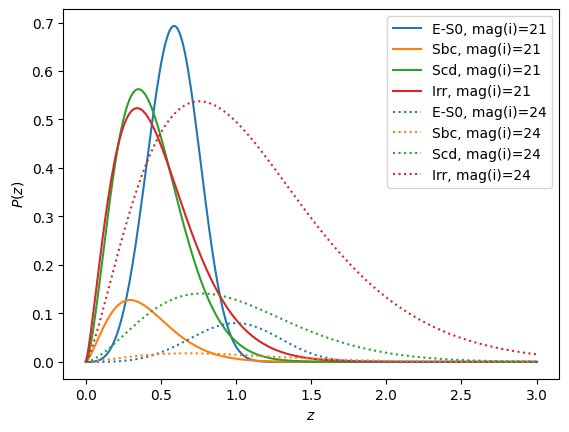

In [38]:
import Cosmology
z_x = np.arange(0.001, 3.011, 0.01)

f, a  =plt.subplots(1,1)
for imag, style in zip([21., 24.],["-", ":"]):
    for i, (nuvk, morph, color) in enumerate(zip([4.5, 3.5, 2.5, 1.5], ["E-S0", "Sbc", "Scd", "Irr"], ["tab:blue", "tab:orange", "tab:green", "tab:red"])) :
        alpt0, zot, kt, pcal = Cosmology.nz_prior_params(nuvk)
        p_nz = Cosmology.nz_prior_core(z_x, imag, alpt0, zot, kt, pcal, Cosmology.ktf[i], Cosmology.ft[i])
        a.plot(z_x, p_nz, label=f"{morph}, mag(i)={imag:.0f}", ls=style, c=color)
a.set_xlabel("$z$")
a.set_ylabel("$P(z)$")
a.legend()